In [12]:
import pandas as pd
import numpy as np

In [13]:
import pandas as pd
import numpy as np
from itertools import compress

def tsv_to_dataframe(file_tsv):
    '''
    this function transforms Eurostat tsv file in pandas dataframe
    file_tsv: file name. It's work with tsv and compressed file "tsv.gz"
    '''
    
    def clean_cells(x):
        '''This function transforms Eurostat Missing Values ": " in numpy missing values.
        Then clean Eurostat annotation "b, u, .."'''
        try:
            return float(x)
        except:
            try:
                return float(x.split(" ")[0])
            except:
                return np.nan
    # open the Eurostat TSV file 

    data = pd.read_csv(file_tsv, sep="\t")
    # Create a dataframe for values data
    data_clean = data
    # Clean data values with clean_cells function
    data_clean = data_clean.applymap(lambda x: clean_cells(x))
    # Drop column with variable name like "age,isced11,unit,sex,geo\time". It is the first column. we have a 
    # dataframe with only data values 
    data_clean.drop(data_clean.columns[0], axis = 1, inplace = True)
    # transform column with variable in multiple-columns  
    variabili = data[data.columns[0]].apply(lambda x: pd.Series(x.split(",")))
    variabili.columns = data.columns[0].split(",")
    # return cleaned dataframe in pandas dataframe
    return pd.concat([variabili, data_clean], axis = 1)



def tsv_to_dataframe_long(file_tsv):
    '''
    this function transforms Eurostat tsv file in pandas dataframe
    file_tsv: file name. It's work with tsv and compressed file "tsv.gz"
    '''
    
    def clean_cells(x):
        '''This function transforms Eurostat Missing Values ": " in numpy missing values.
        Then clean Eurostat annotation "b, u, .."'''
        try:
            return float(x)
        except:
            try:
                return float(x.split(" ")[0])
            except:
                return np.nan
            
    def annotation(x):
            '''This function extracts Eurostat annotation "b, u, .."'''
            try:
                return x.split(" ")[1]
            except:
                return np.nan

    def columns_type(x):
            try:
                return int(x.strip())
            except:
                if x == "geo\\time":
                    return "var_" + "geo"
                else:
                    return "var_" + x

    
    # open the Eurostat TSV file 

    data = pd.read_csv(file_tsv, sep="\t")
    # Create a dataframe for values data
    data_clean = data
    # Clean data values with clean_cells function
    data_clean = data_clean.applymap(lambda x: x)
    # Drop column with variable name like "age,isced11,unit,sex,geo\time". It is the first column. we have a 
    # dataframe with only data values 
    data_clean.drop(data_clean.columns[0], axis = 1, inplace = True)
    # transform column with variable in multiple-columns  
    variabili = data[data.columns[0]].apply(lambda x: pd.Series(x.split(",")))
    variabili.columns = data.columns[0].split(",")
    # return cleaned dataframe in pandas dataframe
    result = pd.concat([variabili, data_clean], axis = 1)
    colonne  = list(map(lambda x: columns_type(x), list(result.columns.values)))
    result.columns = colonne
    colonne_var = result.columns.map(lambda x: str(x)[0:3] == "var")
    index = list(compress(result.columns, colonne_var))
    result = result.melt(id_vars = index)
    result["value_raw"] = result["value"]
    result["eurostat_annotation"] = result["value_raw"].apply(lambda x: annotation(x))
    result["value"] = result["value"].apply(clean_cells) 
    
    
    return result

#example 
#if __name__ == "__main__":
import urllib.request
import gzip

eurostat_link = "http://ec.europa.eu/eurostat/estat-navtree-portlet-prod/BulkDownloadListing?sort=1&file=data%2Faact_eaa07.tsv.gz"
urllib.request.urlretrieve(eurostat_link , "file.tsv.gz")



('file.tsv.gz', <http.client.HTTPMessage at 0x7f94a2f7f860>)

In [14]:
wide = tsv_to_dataframe("yth_empl_160.tsv")

In [15]:
wide[(wide['geo\\time'] == "AT") & (wide["isced11"] == "TOTAL")]

,sex,age,wstatus,typtrai,isced11,unit,geo\time,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
227,F,Y15-19,NEMP,NO_FED_NFE,TOTAL,PC,AT,7.4,5.7,5.0,...,5.1,5.5,5.0,5.1,4.1,4.8,5.7,4.4,4.7,3.9
493,F,Y15-24,NEMP,NO_FED_NFE,TOTAL,PC,AT,9.2,8.8,8.1,...,8.0,8.7,7.7,7.2,7.0,7.4,7.4,7.3,7.4,6.0
759,F,Y15-29,NEMP,NO_FED_NFE,TOTAL,PC,AT,12.2,11.9,11.3,...,11.0,11.2,10.6,9.8,9.5,9.7,10.3,9.2,9.4,9.1
1025,F,Y20-24,NEMP,NO_FED_NFE,TOTAL,PC,AT,10.9,11.7,11.0,...,10.7,11.7,10.2,9.2,9.5,9.8,8.9,9.8,9.7,7.7
1291,F,Y25-29,NEMP,NO_FED_NFE,TOTAL,PC,AT,17.8,18.0,17.5,...,16.6,16.0,15.8,14.5,14.2,13.7,15.4,12.4,12.8,14.1
1555,M,Y15-19,NEMP,NO_FED_NFE,TOTAL,PC,AT,7.0,6.3,5.9,...,5.9,5.5,5.3,5.9,4.7,5.1,5.3,5.3,5.6,4.1
1821,M,Y15-24,NEMP,NO_FED_NFE,TOTAL,PC,AT,9.0,8.4,7.5,...,6.8,7.7,7.2,7.3,6.6,7.2,8.0,7.7,8.0,7.0
2087,M,Y15-29,NEMP,NO_FED_NFE,TOTAL,PC,AT,8.5,8.2,7.8,...,6.7,7.9,7.7,7.3,6.9,7.6,8.4,8.2,8.4,7.8
2353,M,Y20-24,NEMP,NO_FED_NFE,TOTAL,PC,AT,11.0,10.4,9.0,...,7.6,9.9,8.9,8.7,8.5,9.1,10.2,9.7,10.0,9.5
2619,M,Y25-29,NEMP,NO_FED_NFE,TOTAL,PC,AT,7.5,7.8,8.4,...,6.6,8.2,8.5,7.1,7.4,8.2,9.1,9.0,9.2,8.9


In [18]:
tsv_to_dataframe_long("yth_empl_160.tsv")

,var_sex,var_age,var_wstatus,var_typtrai,var_isced11,var_unit,var_geo,variable,value,value_raw,eurostat_annotation
0,F,Y15-19,NEMP,NO_FED_NFE,ED0-2,PC,AT,2004,4.7,4.7 b,b
1,F,Y15-19,NEMP,NO_FED_NFE,ED0-2,PC,BE,2004,7.3,7.3 b,b
2,F,Y15-19,NEMP,NO_FED_NFE,ED0-2,PC,BG,2004,13.7,13.7,
3,F,Y15-19,NEMP,NO_FED_NFE,ED0-2,PC,CH,2004,3.9,3.9,
4,F,Y15-19,NEMP,NO_FED_NFE,ED0-2,PC,CY,2004,2.4,2.4 u,u
5,F,Y15-19,NEMP,NO_FED_NFE,ED0-2,PC,CZ,2004,5.3,5.3,
6,F,Y15-19,NEMP,NO_FED_NFE,ED0-2,PC,DE,2004,2.6,2.6,
7,F,Y15-19,NEMP,NO_FED_NFE,ED0-2,PC,DK,2004,2.2,2.2 u,u
8,F,Y15-19,NEMP,NO_FED_NFE,ED0-2,PC,EA18,2004,4.8,4.8,
9,F,Y15-19,NEMP,NO_FED_NFE,ED0-2,PC,EA19,2004,4.8,4.8,


In [19]:
data = pd.read_csv(yth_empl_160.tsv, sep="\t"):

SyntaxError: invalid syntax (<ipython-input-19-1822863e8c98>, line 1)

In [20]:
tsv_to_dataframe(yth_empl_160.tsv).apply

NameError: name 'yth_empl_160' is not defined

In [21]:
neet_long = tsv_to_dataframe_long("yth_empl_160.tsv")

In [22]:
neet_long ["var_age"].value_counts() #possibili età e quanti sono per ogni classe di età


Y15-29    11172
Y20-24    11172
Y15-24    11172
Y25-29    11172
Y15-19    11116
Name: var_age, dtype: int64

In [23]:
neet_long ["var_geo"].value_counts()

EL      1470
LT      1470
MK      1470
IT      1470
FI      1470
DE      1470
EU28    1470
TR      1470
UK      1470
SE      1470
DK      1470
LV      1470
CY      1470
NL      1470
EA18    1470
AT      1470
BG      1470
BE      1470
LU      1470
ES      1470
HR      1470
PT      1470
SK      1470
CH      1470
HU      1470
NO      1470
EU27    1470
EA19    1470
RO      1470
FR      1470
SI      1470
PL      1470
EE      1470
CZ      1470
MT      1470
IE      1470
IS      1456
ME      1428
Name: var_geo, dtype: int64

In [24]:
neet_long ["var_age"] = "Y15-29"

In [25]:
neet_1529 = neet_long ["var_age"] == "Y15-29"

In [26]:
neet_long [neet_1529]

,var_sex,var_age,var_wstatus,var_typtrai,var_isced11,var_unit,var_geo,variable,value,value_raw,eurostat_annotation
0,F,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,AT,2004,4.7,4.7 b,b
1,F,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,BE,2004,7.3,7.3 b,b
2,F,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,BG,2004,13.7,13.7,
3,F,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,CH,2004,3.9,3.9,
4,F,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,CY,2004,2.4,2.4 u,u
5,F,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,CZ,2004,5.3,5.3,
6,F,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,DE,2004,2.6,2.6,
7,F,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,DK,2004,2.2,2.2 u,u
8,F,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,EA18,2004,4.8,4.8,
9,F,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,EA19,2004,4.8,4.8,


In [27]:
neet_long ["var_sex"]== "T"

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
55774     True
55775     True
55776     True
55777     True
55778     True
55779     True
55780     True
55781     True
55782     True
55783     True
55784     True
55785     True
55786     True
55787     True
55788     True
55789     True
55790     True
55791     True
55792     True
55793     True
55794     True
55795     True
55796     True
55797     True
55798     True
55799     True
55800     True
55801     True
55802     True
55803     True
Name: var_sex, Length: 55804, dtype: bool

In [28]:
neet_T = neet_long ["var_sex"] == "T"
neet_T

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
55774     True
55775     True
55776     True
55777     True
55778     True
55779     True
55780     True
55781     True
55782     True
55783     True
55784     True
55785     True
55786     True
55787     True
55788     True
55789     True
55790     True
55791     True
55792     True
55793     True
55794     True
55795     True
55796     True
55797     True
55798     True
55799     True
55800     True
55801     True
55802     True
55803     True
Name: var_sex, Length: 55804, dtype: bool

In [29]:
neet_long [neet_1529][neet_T]

,var_sex,var_age,var_wstatus,var_typtrai,var_isced11,var_unit,var_geo,variable,value,value_raw,eurostat_annotation
2657,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,AT,2004,4.9,4.9 b,b
2658,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,BE,2004,8.1,8.1 b,b
2659,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,BG,2004,12.8,12.8,
2660,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,CH,2004,4.2,4.2,
2661,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,CY,2004,2.3,2.3 u,u
2662,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,CZ,2004,4.9,4.9,
2663,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,DE,2004,2.4,2.4,
2664,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,DK,2004,2.1,2.1,
2665,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,EA18,2004,4.9,4.9,
2666,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,EA19,2004,4.9,4.9,


In [30]:
                  neet_long [neet_1529][neet_T]                                                                  # creazione tabella pivot 

,var_sex,var_age,var_wstatus,var_typtrai,var_isced11,var_unit,var_geo,variable,value,value_raw,eurostat_annotation
2657,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,AT,2004,4.9,4.9 b,b
2658,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,BE,2004,8.1,8.1 b,b
2659,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,BG,2004,12.8,12.8,
2660,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,CH,2004,4.2,4.2,
2661,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,CY,2004,2.3,2.3 u,u
2662,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,CZ,2004,4.9,4.9,
2663,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,DE,2004,2.4,2.4,
2664,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,DK,2004,2.1,2.1,
2665,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,EA18,2004,4.9,4.9,
2666,T,Y15-29,NEMP,NO_FED_NFE,ED0-2,PC,EA19,2004,4.9,4.9,


In [31]:
totale = neet_long [neet_1529][neet_T]
totale.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [32]:
totale.value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [33]:
pd.pivot_table (totale, values = "value", 
                index = "var_geo", columns = "variable")

variable,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
var_geo,,,,,,,,,,,,,,
AT,5.845455,5.677273,5.277273,5.131818,4.886364,5.318182,5.040909,4.695455,4.481818,4.722727,4.054545,3.900000,3.833333,3.525000
BE,8.441667,7.291667,6.654167,6.666667,6.095833,6.629167,6.550000,6.983333,7.300000,7.587500,5.938235,5.994118,5.376471,5.061765
BG,14.704167,13.725000,12.416667,10.645833,10.359091,11.777273,12.179167,12.787500,12.695833,13.054167,9.985294,9.185294,9.047059,8.018750
CH,4.213636,4.409091,4.229167,3.708333,3.900000,4.645833,4.191667,4.204167,4.112500,4.304167,3.538235,3.426471,3.426471,3.197059
CY,5.441667,9.937500,6.504167,5.570833,5.816667,6.308333,7.170833,8.512500,9.620833,11.470833,9.000000,8.645455,8.496970,8.306061
CZ,9.358333,8.916667,7.125000,5.870833,5.408333,6.545833,6.695833,6.245833,6.583333,6.608333,5.454545,5.027273,4.672727,4.257576
DE,6.420833,6.995833,6.308333,5.758333,5.445833,5.625000,5.312500,4.720833,4.483333,4.145833,3.397059,3.252941,3.429412,3.235294
DK,3.568182,3.222727,2.563636,2.910000,2.825000,3.715000,3.840909,3.981818,3.966667,3.918182,2.966667,3.224242,3.003125,3.545455
EA18,7.145833,7.212500,6.741667,6.458333,6.554167,7.475000,7.328000,7.666667,7.979167,8.045833,6.538235,6.177143,6.100000,5.826471


In [34]:
filtrato = totale [Total & (totale ["eurostat_annotation"] == "")]

NameError: name 'Total' is not defined

In [35]:
nuova = wide [wide["isced11"] == "TOTAL"] #wide filtrata per titolo di studio
nuova

,sex,age,wstatus,typtrai,isced11,unit,geo\time,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
227,F,Y15-19,NEMP,NO_FED_NFE,TOTAL,PC,AT,7.4,5.7,5.0,...,5.1,5.5,5.0,5.1,4.1,4.8,5.7,4.4,4.7,3.9
228,F,Y15-19,NEMP,NO_FED_NFE,TOTAL,PC,BE,10.9,8.2,6.1,...,4.9,5.3,5.1,6.6,6.8,6.3,6.3,5.9,4.1,3.9
229,F,Y15-19,NEMP,NO_FED_NFE,TOTAL,PC,BG,19.6,18.8,17.9,...,15.3,15.7,16.2,15.9,15.8,14.3,14.7,14.1,13.7,13.3
230,F,Y15-19,NEMP,NO_FED_NFE,TOTAL,PC,CH,4.6,5.4,5.4,...,6.2,5.4,4.6,3.9,4.9,4.6,4.0,4.8,4.4,4.1
231,F,Y15-19,NEMP,NO_FED_NFE,TOTAL,PC,CY,4.7,18.5,6.9,...,5.8,4.9,7.2,7.2,7.4,7.5,6.6,7.3,8.8,9.4
232,F,Y15-19,NEMP,NO_FED_NFE,TOTAL,PC,CZ,8.3,8.9,4.2,...,3.0,3.5,3.6,3.5,3.2,3.2,3.0,3.1,2.5,2.8
233,F,Y15-19,NEMP,NO_FED_NFE,TOTAL,PC,DE,3.5,4.5,4.2,...,4.0,4.0,3.9,3.4,3.1,2.6,3.0,3.0,3.4,3.2
234,F,Y15-19,NEMP,NO_FED_NFE,TOTAL,PC,DK,3.3,2.8,2.3,...,2.6,3.5,3.0,3.5,3.7,3.0,2.8,2.6,2.3,3.9
235,F,Y15-19,NEMP,NO_FED_NFE,TOTAL,PC,EA18,6.9,7.5,6.9,...,6.5,6.5,6.8,6.6,6.4,6.2,6.1,5.9,5.6,5.9
236,F,Y15-19,NEMP,NO_FED_NFE,TOTAL,PC,EA19,6.8,7.4,6.9,...,6.5,6.5,6.7,6.6,6.3,6.2,6.1,5.9,5.6,5.8


In [47]:
definitiva = nuova[(nuova["age"] == "Y15-29") & (nuova["sex"] == "T")] #nuova con più filtri (età e sesso)
definitiva

,sex,age,wstatus,typtrai,isced11,unit,geo\time,2004,2005,2006,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
3416,T,Y15-29,NEMP,NO_FED_NFE,TOTAL,PC,AT,10.3,10.1,9.6,...,8.9,9.6,9.1,8.5,8.2,8.6,9.3,8.7,8.9,8.4
3417,T,Y15-29,NEMP,NO_FED_NFE,TOTAL,PC,BE,16.3,14.0,12.9,...,12.0,12.8,13.0,13.8,14.4,14.9,14.1,14.4,13.0,12.6
3418,T,Y15-29,NEMP,NO_FED_NFE,TOTAL,PC,BG,28.7,26.8,23.9,...,18.5,20.8,23.5,24.7,24.7,25.7,24.0,22.2,22.4,18.9
3419,T,Y15-29,NEMP,NO_FED_NFE,TOTAL,PC,CH,7.6,7.8,8.0,...,6.9,8.8,8.1,8.0,7.7,8.0,7.7,7.3,7.5,7.2
3420,T,Y15-29,NEMP,NO_FED_NFE,TOTAL,PC,CY,10.2,17.9,11.9,...,10.9,11.5,12.9,14.8,17.3,20.4,19.5,18.5,18.0,17.5
3421,T,Y15-29,NEMP,NO_FED_NFE,TOTAL,PC,CZ,17.7,16.9,13.7,...,10.7,12.7,12.9,12.1,12.9,12.8,12.1,11.8,11.1,10.0
3422,T,Y15-29,NEMP,NO_FED_NFE,TOTAL,PC,DE,12.9,13.8,12.7,...,11.0,11.4,10.8,9.7,9.3,8.7,8.7,8.5,8.9,8.5
3423,T,Y15-29,NEMP,NO_FED_NFE,TOTAL,PC,DK,6.4,5.9,4.7,...,5.0,6.5,7.3,7.6,8.2,7.5,7.3,7.7,7.4,9.1
3424,T,Y15-29,NEMP,NO_FED_NFE,TOTAL,PC,EA18,14.4,14.4,13.5,...,13.2,15.0,15.3,15.3,15.9,16.0,15.7,15.2,14.6,13.9
3425,T,Y15-29,NEMP,NO_FED_NFE,TOTAL,PC,EA19,14.4,14.4,13.5,...,13.2,15.0,15.3,15.3,15.9,16.0,15.7,15.2,14.5,13.9


In [51]:
definitiva.columns[7]

'2004 '

In [56]:
seriedati = definitiva.loc[:, ['geo\\time',"2004 ", "2005 ", "2006 ", "2007 ", "2008 ", "2009 ", "2010 ", "2011 ", "2012 ", "2013 ", "2014 ", "2015 ", "2016 ", "2017 "]] #facciamo l'indice, trasformando i valori assoluti e prendendo come riferimento un anno a caso 

In [58]:
seriedati.set_index('geo\\time', inplace= True )

In [61]:
seriedati.loc[["AT", "IT"]].plot()

In [63]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

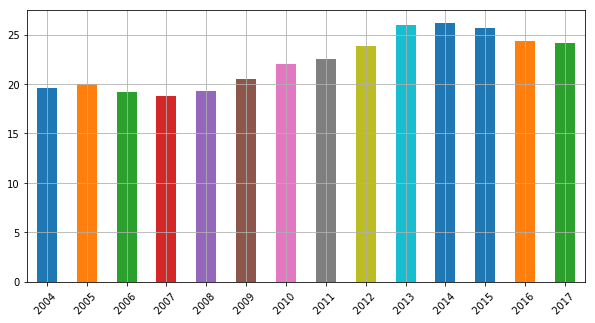

In [67]:
seriedati.loc["IT"].plot(kind = "bar", grid = True, rot=45, figsize = (10, 5))